In [3]:
#Dimensionality reduction algorithm
#Helps speed up machine learning alorithms
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = sns.load_dataset('iris')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


#Standardize the data
PCA issensitive to scale. Use StandardScaler(mean=0, std =1)

In [5]:
cols = ['sepal_length', 'sepal_width', 
        'petal_length', 'petal_width']
#Separate the features. Note the continuous
x = df.loc[:, cols].values

#Separate the species. Note the categoricals
y = df.loc[:, ['species']].values
y

array([['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
    

In [11]:
#Standardize
std = StandardScaler().fit_transform(x)
std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
pca = PCA(n_components=2) #Initialize PCA
PComponents = pca.fit_transform(x)
finaldataframe = pd.DataFrame(data=PComponents,
                             columns = ['component1', 'component2'])
finaldataframe.head()

,component1,component2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


In [6]:
#comine the 2 datasets ignore the transformed
newdf = pd.concat([finaldataframe, df[['species']]], axis=1)
newdf.head()

,component1,component2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


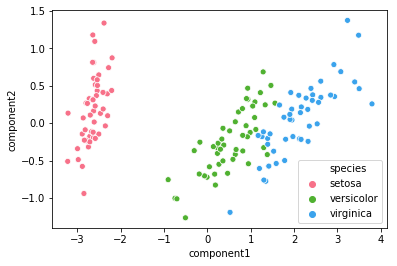

In [7]:
'''fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('component1', fontsize=15)
ax.set_ylabel('component2', fontsize=15)
ax.set_title('PCA technique with 2 principal components' )

species = ['versicolor', 'setosa', 'virginica']
colors = ['r', 'g', 'b']

for x, color in zip(species, colors):
    indicesToKeep = newdf['x']==x
    ax.scatter(newdf.loc[indicesToKeep, 'component1'],
              newdf.loc[indicesToKeep, 'component2'],
              c = color,
              s = 50)
ax.legend(species)
ax.grid()'''

sns.scatterplot(x='component1',
                y='component2', data=newdf,
                hue ='species', palette='husl')

The three classes appear separated but versicolor and virginica need further separation

Explained variance tell us how much info is attributed to each component

In [8]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Together, the 2 components contain (.92+.05 = 97%) of the information. Rule of thumb: if below 85%, it may not be accurate as a lot of information is lost

# Other Applications of PCA

In [9]:
#Speeding up machine learning algorithms

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
mnist.data.shape

(70000, 784)

In [12]:
mnist.target.shape

(70000,)

In [23]:
#Test site: What proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)
    

In [24]:
scaler1 = StandardScaler().fit(train_img)
scaler2 = StandardScaler().fit(test_img)

#Apply transform to both training and test set
training = scaler1.transform(train_img)
test_img = scaler2.transform(test_img)

C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
pca = PCA(.95) #Scikitlearn choose min numbber of pricnipal components
                #suck that 95% of variance is maintained
pca.fit(train_img)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.n_components_ #number of components

154

Apply the mapping (transform) to both the training set and the test set.

In [27]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

Apply Logistic Regression to the Transformed Data
Step 1: Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [30]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\colli\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\colli\AppData\Local\Programs

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Step 4: Predict the labels of new data (new images)

Uses the information the model learned during the model training process

The code below predicts for one observation

In [32]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([5.])

In [33]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[0:10])

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

Measuring Model Performance

While accuracy is not always the best metric for machine learning algorithms (precision, recall, F1 Score, ROC Curve, etc would be better), it is used here for simplicity.

In [34]:
logisticRegr.score(test_img, test_lbl)

0.0921

Image Reconstruction from Compressed Representation
The earlier parts of the tutorial have demonstrated using PCA to compress high dimensional data to lower dimensional data. I wanted to briefly mention that PCA can also take the compressed representation of the data (lower dimensional data) back to an approximation of the original high dimensional data. If you are interested in the code that produce images: check https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb.